# Business Problem


Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. 
Right now they are following this process:
1.	They first identify a set of employees based on recommendations/ past performance
2.	Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3.	At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion


# Goal

Build a model which can predict a future promotee based on the given data accurately.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st
sns.set_style('darkgrid')

In [2]:
Employee_dataset=pd.read_csv('data.xls')

# Exploratory Data Analysis

In [3]:
Employee_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


As you can see above there are two columns which contain null values so we need to extract those values in to another dataset as to get and use them as a test data.

In [4]:
Employee_dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
Employee_dataset.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


You can see that one of the null values column "Previous_year_rating" is highly dependent on two columns namely "KPIs_met >80%" and "is_promoted".
so we are gonna use those two columns as the basis for predicting the missing values for this column.

# Data Visualization

In [6]:
#sns.barplot('education','is_promoted',data=Employee_dataset)

In [7]:
#sns.barplot('education','KPIs_met >80%',data=Employee_dataset)

In [8]:
#sns.barplot('education','age',data=Employee_dataset)

In [9]:
#sns.barplot('education','avg_training_score',data=Employee_dataset)

In [10]:
#sns.barplot('education','length_of_service',data=Employee_dataset)

In [11]:
#sns.barplot('education','is_promoted',hue='recruitment_channel',data=Employee_dataset)

In [12]:
#sns.barplot('education','no_of_trainings',data=Employee_dataset)

In [13]:
#sns.barplot('education','previous_year_rating',hue='is_promoted',data=Employee_dataset)

In [14]:
#sns.barplot('department','length_of_service',hue='education',data=Employee_dataset)
#plt.xticks(rotation=45)

In [15]:
#sns.barplot('gender','length_of_service',hue='education',data=Employee_dataset)
#plt.xticks(rotation=45)

In [16]:
#sns.barplot('previous_year_rating','length_of_service',data=Employee_dataset)


In [17]:
#sns.barplot('previous_year_rating','no_of_trainings',data=Employee_dataset)

In [18]:
#sns.barplot('department','previous_year_rating',data=Employee_dataset)
#plt.xticks(rotation=45)

In [19]:
#sns.barplot('gender','previous_year_rating',data=Employee_dataset)


In [20]:
#sns.barplot('awards_won?','previous_year_rating',data=Employee_dataset)


In [21]:
#sns.barplot('recruitment_channel','previous_year_rating',data=Employee_dataset)


From the above all the graphs we can conclude that the factors that can be used to predict the missing values in the column "education" are "is_promoted","recruitment_channel","length_of_service". These can be used to find the null values.

# Extracting misssing values 

In [22]:
missing_values_dataset=Employee_dataset[Employee_dataset.isnull().any(axis=1)]

In [23]:
missing_values_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6148 entries, 10 to 54806
Data columns (total 14 columns):
employee_id             6148 non-null int64
department              6148 non-null object
region                  6148 non-null object
education               3739 non-null object
gender                  6148 non-null object
recruitment_channel     6148 non-null object
no_of_trainings         6148 non-null int64
age                     6148 non-null int64
previous_year_rating    2024 non-null float64
length_of_service       6148 non-null int64
KPIs_met >80%           6148 non-null int64
awards_won?             6148 non-null int64
avg_training_score      6148 non-null int64
is_promoted             6148 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 720.5+ KB


In [24]:
missing_values_dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0


Lets do the predictions for missing values by column by column 
# For Education column

In [25]:
missing_values_edu=Employee_dataset[Employee_dataset['education'].isnull()]

In [26]:
missing_values_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409 entries, 10 to 54806
Data columns (total 14 columns):
employee_id             2409 non-null int64
department              2409 non-null object
region                  2409 non-null object
education               0 non-null object
gender                  2409 non-null object
recruitment_channel     2409 non-null object
no_of_trainings         2409 non-null int64
age                     2409 non-null int64
previous_year_rating    2024 non-null float64
length_of_service       2409 non-null int64
KPIs_met >80%           2409 non-null int64
awards_won?             2409 non-null int64
avg_training_score      2409 non-null int64
is_promoted             2409 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 282.3+ KB


Now lets take the main_dataset and drop all those missing values in it

In [27]:
train_data=Employee_dataset.dropna()

In [28]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             48660 non-null int64
department              48660 non-null object
region                  48660 non-null object
education               48660 non-null object
gender                  48660 non-null object
recruitment_channel     48660 non-null object
no_of_trainings         48660 non-null int64
age                     48660 non-null int64
previous_year_rating    48660 non-null float64
length_of_service       48660 non-null int64
KPIs_met >80%           48660 non-null int64
awards_won?             48660 non-null int64
avg_training_score      48660 non-null int64
is_promoted             48660 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


Lets reset the index for the train data

In [30]:
train_data.reset_index(inplace=True,drop=True)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 14 columns):
employee_id             48660 non-null int64
department              48660 non-null object
region                  48660 non-null object
education               48660 non-null object
gender                  48660 non-null object
recruitment_channel     48660 non-null object
no_of_trainings         48660 non-null int64
age                     48660 non-null int64
previous_year_rating    48660 non-null float64
length_of_service       48660 non-null int64
KPIs_met >80%           48660 non-null int64
awards_won?             48660 non-null int64
avg_training_score      48660 non-null int64
is_promoted             48660 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.2+ MB


Input and output variables

In [60]:
x=train_data.drop(['employee_id','education','previous_year_rating','region'],axis=1)
y=train_data['education']

In [61]:
x.head()

,department,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,f,sourcing,1,35,8,1,0,49,0
1,Operations,m,other,1,30,4,0,0,60,0
2,Sales & Marketing,m,sourcing,1,34,7,0,0,50,0
3,Sales & Marketing,m,other,2,39,10,0,0,50,0
4,Technology,m,other,1,45,2,0,0,73,0


In [62]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 10 columns):
department             48660 non-null object
gender                 48660 non-null object
recruitment_channel    48660 non-null object
no_of_trainings        48660 non-null int64
age                    48660 non-null int64
length_of_service      48660 non-null int64
KPIs_met >80%          48660 non-null int64
awards_won?            48660 non-null int64
avg_training_score     48660 non-null int64
is_promoted            48660 non-null int64
dtypes: int64(7), object(3)
memory usage: 3.7+ MB


# Encoding the data

In [63]:
x=pd.get_dummies(x,drop_first=True)

In [64]:
x.head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,1
1,1,30,4,0,0,60,0,0,0,0,1,0,0,0,0,1,0,0
2,1,34,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,1
3,2,39,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0
4,1,45,2,0,0,73,0,0,0,0,0,0,0,0,1,1,0,0


In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Buiding the model

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc=RandomForestClassifier(100)

In [68]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
predictions=rfc.predict(x_test)

# Model Evaluation

In [70]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [71]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

                  precision    recall  f1-score   support

      Bachelor's       0.74      0.80      0.77      6615
 Below Secondary       0.50      0.36      0.42       100
Master's & above       0.48      0.40      0.44      3017

       micro avg       0.67      0.67      0.67      9732
       macro avg       0.57      0.52      0.54      9732
    weighted avg       0.66      0.67      0.66      9732

[[5298   35 1282]
 [  63   36    1]
 [1811    1 1205]]
0.6719071105630908


Now lets predict the education column missing values

In [72]:
test_edu=missing_values_edu.drop(['employee_id','education','previous_year_rating','region'],axis=1)
test_edu=pd.get_dummies(test_edu,drop_first=True)

In [73]:
test_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409 entries, 10 to 54806
Data columns (total 18 columns):
no_of_trainings                 2409 non-null int64
age                             2409 non-null int64
length_of_service               2409 non-null int64
KPIs_met >80%                   2409 non-null int64
awards_won?                     2409 non-null int64
avg_training_score              2409 non-null int64
is_promoted                     2409 non-null int64
department_Finance              2409 non-null uint8
department_HR                   2409 non-null uint8
department_Legal                2409 non-null uint8
department_Operations           2409 non-null uint8
department_Procurement          2409 non-null uint8
department_R&D                  2409 non-null uint8
department_Sales & Marketing    2409 non-null uint8
department_Technology           2409 non-null uint8
gender_m                        2409 non-null uint8
recruitment_channel_referred    2409 non-null uint8
recruit

In [74]:
test_edu['education']=rfc.predict(test_edu)

In [75]:
test_edu.head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,education
10,1,30,1,0,0,77,0,0,0,0,0,0,0,0,1,1,0,1,Bachelor's
21,1,41,11,0,0,57,0,0,0,0,1,0,0,0,0,1,0,1,Bachelor's
32,1,24,2,0,0,48,0,0,0,0,0,0,0,1,0,0,0,1,Bachelor's
43,3,24,2,0,0,48,0,0,0,0,0,0,0,1,0,1,0,0,Bachelor's
82,2,25,2,0,0,53,0,0,0,0,0,0,0,1,0,1,0,1,Bachelor's


In [76]:
test_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409 entries, 10 to 54806
Data columns (total 19 columns):
no_of_trainings                 2409 non-null int64
age                             2409 non-null int64
length_of_service               2409 non-null int64
KPIs_met >80%                   2409 non-null int64
awards_won?                     2409 non-null int64
avg_training_score              2409 non-null int64
is_promoted                     2409 non-null int64
department_Finance              2409 non-null uint8
department_HR                   2409 non-null uint8
department_Legal                2409 non-null uint8
department_Operations           2409 non-null uint8
department_Procurement          2409 non-null uint8
department_R&D                  2409 non-null uint8
department_Sales & Marketing    2409 non-null uint8
department_Technology           2409 non-null uint8
gender_m                        2409 non-null uint8
recruitment_channel_referred    2409 non-null uint8
recruit

# Now lets do the same for Previous_year_rating column

In [77]:
missing_values_pyr=Employee_dataset[Employee_dataset['previous_year_rating'].isnull()]

In [78]:
missing_values_pyr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4124 entries, 10 to 54801
Data columns (total 14 columns):
employee_id             4124 non-null int64
department              4124 non-null object
region                  4124 non-null object
education               3739 non-null object
gender                  4124 non-null object
recruitment_channel     4124 non-null object
no_of_trainings         4124 non-null int64
age                     4124 non-null int64
previous_year_rating    0 non-null float64
length_of_service       4124 non-null int64
KPIs_met >80%           4124 non-null int64
awards_won?             4124 non-null int64
avg_training_score      4124 non-null int64
is_promoted             4124 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 483.3+ KB


Assigning Input and output variables

In [79]:
x=train_data.drop(['employee_id','previous_year_rating','education','region'],axis=1)
y=train_data['previous_year_rating']

In [80]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,1
1,1,30,4,0,0,60,0,0,0,0,1,0,0,0,0,1,0,0
2,1,34,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,1
3,2,39,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0
4,1,45,2,0,0,73,0,0,0,0,0,0,0,0,1,1,0,0


In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc=RandomForestClassifier(100)

In [84]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
predictions=rfc.predict(x_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [87]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.20      0.16      0.18      1147
         2.0       0.11      0.07      0.09       798
         3.0       0.41      0.50      0.45      3573
         4.0       0.22      0.17      0.19      1910
         5.0       0.38      0.41      0.39      2304

   micro avg       0.34      0.34      0.34      9732
   macro avg       0.26      0.26      0.26      9732
weighted avg       0.32      0.34      0.32      9732

[[ 182   87  585  147  146]
 [ 102   56  406   94  140]
 [ 337  182 1769  529  756]
 [ 160   97  827  328  498]
 [ 121   70  780  389  944]]
0.3369297163995068


Now lets predict the previous_year_raing missing columns

In [88]:
test_pyr=missing_values_pyr.drop(['employee_id','previous_year_rating','education','region'],axis=1)
test_pyr=pd.get_dummies(test_pyr,drop_first=True)

In [89]:
test_pyr['previous_year_rating']=rfc.predict(test_pyr)

In [90]:
test_pyr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4124 entries, 10 to 54801
Data columns (total 19 columns):
no_of_trainings                 4124 non-null int64
age                             4124 non-null int64
length_of_service               4124 non-null int64
KPIs_met >80%                   4124 non-null int64
awards_won?                     4124 non-null int64
avg_training_score              4124 non-null int64
is_promoted                     4124 non-null int64
department_Finance              4124 non-null uint8
department_HR                   4124 non-null uint8
department_Legal                4124 non-null uint8
department_Operations           4124 non-null uint8
department_Procurement          4124 non-null uint8
department_R&D                  4124 non-null uint8
department_Sales & Marketing    4124 non-null uint8
department_Technology           4124 non-null uint8
gender_m                        4124 non-null uint8
recruitment_channel_referred    4124 non-null uint8
recruit

now lets store the two missing value columns with the predicted data

In [91]:
missing_values_dataset['education'].fillna(test_edu['education'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [92]:
missing_values_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6148 entries, 10 to 54806
Data columns (total 14 columns):
employee_id             6148 non-null int64
department              6148 non-null object
region                  6148 non-null object
education               6148 non-null object
gender                  6148 non-null object
recruitment_channel     6148 non-null object
no_of_trainings         6148 non-null int64
age                     6148 non-null int64
previous_year_rating    2024 non-null float64
length_of_service       6148 non-null int64
KPIs_met >80%           6148 non-null int64
awards_won?             6148 non-null int64
avg_training_score      6148 non-null int64
is_promoted             6148 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 720.5+ KB


In [93]:
missing_values_dataset['previous_year_rating'].fillna(test_pyr['previous_year_rating'],inplace=True)

Now lets take this missing value dataset as test data and the regular one as train data and build the model for our main objective.

In [94]:
train_data.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005665,0.000260,0.004465,0.001644,0.001215,0.008883,0.000945,0.002306
no_of_trainings,-0.005665,1.000000,-0.083590,-0.064236,-0.055440,-0.046673,-0.008528,0.042033,-0.025006
age,0.000260,-0.083590,1.000000,0.005068,0.620348,-0.033886,-0.010335,-0.066214,-0.022412
previous_year_rating,0.004465,-0.064236,0.005068,1.000000,-0.001252,0.352434,0.027920,0.070041,0.158715
length_of_service,0.001644,-0.055440,0.620348,-0.001252,1.000000,-0.089081,-0.043750,-0.047461,-0.014267
KPIs_met >80%,0.001215,-0.046673,-0.033886,0.352434,-0.089081,1.000000,0.095208,0.074114,0.219933
awards_won?,0.008883,-0.008528,-0.010335,0.027920,-0.043750,0.095208,1.000000,0.073132,0.196971
avg_training_score,0.000945,0.042033,-0.066214,0.070041,-0.047461,0.074114,0.073132,1.000000,0.179494
is_promoted,0.002306,-0.025006,-0.022412,0.158715,-0.014267,0.219933,0.196971,0.179494,1.000000


In the numerical columns the output is mostly dependent on the 'previous_year_rating','KPIs_met >80%','awards_won?' and 'avg_training_score' columns.

In [ ]:
#sns.countplot('department',hue='is_promoted',data=train_data)
#plt.xticks(rotation=45)

In [ ]:
#sns.countplot('region',hue='is_promoted',data=train_data)
#plt.xticks(rotation=45)

In [ ]:
#sns.countplot('gender',hue='is_promoted',data=train_data)
#plt.xticks(rotation=45)

In [ ]:
#sns.countplot('no_of_trainings',hue='is_promoted',data=train_data)
#plt.xticks(rotation=45)

In [ ]:
#sns.countplot('recruitment_channel',hue='is_promoted',data=train_data)
#plt.xticks(rotation=45)

In [ ]:
#sns.barplot('is_promoted','age',data=train_data)
#plt.xticks(rotation=45)

In [ ]:
missing_values_dataset.info()

In the categorical columns most variations can be seen in 'recruitment_channel','no_of_trainings','gender','department' columns.
so we are going to use these as inputs in the categorical columns.

# Assigning training data

In [95]:
x_train=train_data[['previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score','recruitment_channel','no_of_trainings','gender','department']]
y_train=train_data['is_promoted']

In [96]:
x_train=pd.get_dummies(x_train,drop_first=True)

In [97]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 16 columns):
previous_year_rating            48660 non-null float64
KPIs_met >80%                   48660 non-null int64
awards_won?                     48660 non-null int64
avg_training_score              48660 non-null int64
no_of_trainings                 48660 non-null int64
recruitment_channel_referred    48660 non-null uint8
recruitment_channel_sourcing    48660 non-null uint8
gender_m                        48660 non-null uint8
department_Finance              48660 non-null uint8
department_HR                   48660 non-null uint8
department_Legal                48660 non-null uint8
department_Operations           48660 non-null uint8
department_Procurement          48660 non-null uint8
department_R&D                  48660 non-null uint8
department_Sales & Marketing    48660 non-null uint8
department_Technology           48660 non-null uint8
dtypes: float64(1), int64(4), uint8(11)
m

In [98]:
x_train.head()

,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings,recruitment_channel_referred,recruitment_channel_sourcing,gender_m,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,5.0,1,0,49,1,0,1,0,0,0,0,0,0,0,1,0
1,5.0,0,0,60,1,0,0,1,0,0,0,1,0,0,0,0
2,3.0,0,0,50,1,0,1,1,0,0,0,0,0,0,1,0
3,1.0,0,0,50,2,0,0,1,0,0,0,0,0,0,1,0
4,3.0,0,0,73,1,0,0,1,0,0,0,0,0,0,0,1


# Training the model

In [99]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Feature Importances

ValueError: Number of features of the model must match the input. Model n_features is 16 and input n_features is 18 

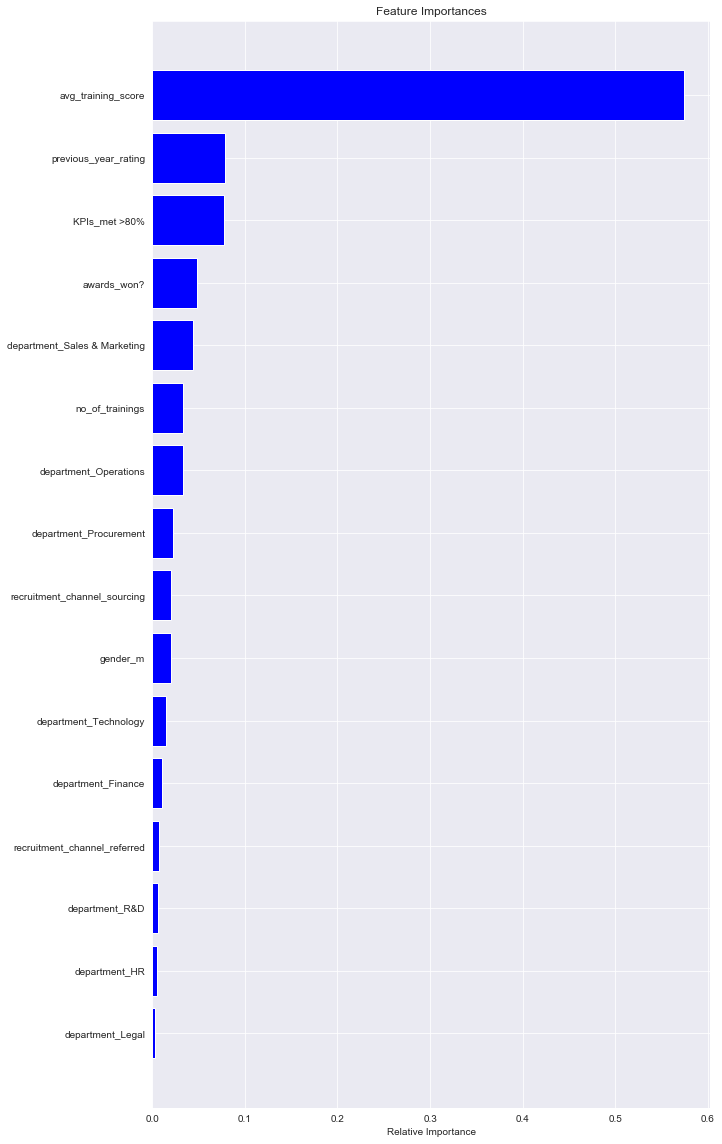

In [100]:
features=x_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
predictions=rfc.predict(x_test)

# Assigning test data

In [101]:
x_test=missing_values_dataset[['previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score','recruitment_channel','no_of_trainings','gender','department']]
y_test=missing_values_dataset['is_promoted']

In [102]:
x_test=pd.get_dummies(x_test,drop_first=True)

# Model Evaluation by prediction

In [103]:
predictions=rfc.predict(x_test)

In [104]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5712
           1       0.81      0.36      0.50       436

   micro avg       0.95      0.95      0.95      6148
   macro avg       0.88      0.68      0.74      6148
weighted avg       0.94      0.95      0.94      6148

[[5676   36]
 [ 278  158]]
0.9489264801561483


# Checking if this works on multiple classifiers

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [106]:
clfs=[RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),MultinomialNB(),LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier()]

In [107]:
means=[]
for i in clfs:
    cvs=cross_val_score(i,x_train,y_train,scoring='accuracy',cv=8,verbose=1,n_jobs=-1)
    means.append(cvs.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8

In [108]:
for i in range(10):
    print(clfs[i].__class__.__name__ , ':' ,means[i]*100)

RandomForestClassifier : 93.33950071257503
ExtraTreesClassifier : 93.4381490931947
AdaBoostClassifier : 92.2277054132727
GradientBoostingClassifier : 94.05878037147315
MultinomialNB : 91.20633008157515
LogisticRegression : 92.79901621777837
SVC : 94.12660007731478
KNeighborsClassifier : 93.08878988094268
DecisionTreeClassifier : 93.35594942979672
GradientBoostingClassifier : 94.05878037147315


# Conclusion
From all the analysis we have done up to this point shows that the predicted data has a accuracy of 94% and also the average f1_score is around 95%. This model can be considered as a good model with a good precision of the data.